<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**CONTEXT**: Our global population is projected to grow from approximately 7.3 billion today to 9.7 billion in the year 2050. Finding ways to feed the growing world population has become a hot topic for organizations, entrepreneurs and philanthropists of agriculture and food.

These solutions range from changing the way we grow and raise our food to changing the way we eat. To make matters more difficult, the Earth's climate is changing and being influenced by agriculture. As the world's population has expanded and grown richer, the demand for food, energy and water has seen a rapid increase. Not only has the demand for all three increased, but they are also strongly interconnected: food production requires water and energy; traditional energy production requires water resources; agriculture provides a potential source of energy and lots of water.
 
 
**OBJECTIVE**: Through an Exploratory Data Analysis I want to try to understand what are the practices, foods that are destroying our planet, control climate change and as much information as I can get from these dataframes.

**Data I will use:**

- At this link link [Who eats the food we grow?](https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production), on the Kaggle website, you will find the first useful dataset that provides an overview of our world food production, focusing on a comparison between food produced for human consumption and feed produced for animals.

- This dataset is made available by the United Nations Organization, which for food and agriculture provides free access to data on food and agriculture for over 245 countries and territories (the csv named 'FAOSTAT_data_3-24-2022'), from the year 1961 to the most recent update.

- While the second useful dataset present at this link [Environment Impact of Food Production](https://www.kaggle.com/selfvivek/environment-impact-of-food-production) contains the 43 most common foods grown worldwide and 23 columns describing values such as water use and greenhouse gas emissions.

**Imports and Data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import floor
from itertools import chain

In [2]:
sns.set_style("darkgrid")

In [3]:
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 50)

In [4]:
fao = pd.read_csv("archive/FAO.csv", encoding='latin1')

fao_stat = pd.read_csv("archive/FAOSTAT_data_3-24-2022.csv")

food = pd.read_csv("archive/Food_Production.csv")

**Useful Functions**

In [5]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [6]:
def flatten_list(lst):
    flattened_list = []
    for item in lst:
        if isinstance(item, list):
            flattened_list.extend(item)
        else:
            flattened_list.append(item)
    return flattened_list

## Data Preprocessing

In [7]:
fao.shape, fao_stat.shape, food.shape

((21477, 63), (267665, 14), (43, 23))

In [9]:
food = food.rename(columns={
    'Food product': 'Prodotto alimentare',
    'Land use change': 'Cambiamento di uso del suolo',
    'Animal Feed': 'Mangime animale',
    'Farm': 'Agricoltura',
    'Processing': 'Elaborazione',
    'Transport': 'Trasporto',
    'Packging': 'Imballaggio',
    'Retail': 'Vendita al dettaglio',
    'Total_emissions': 'Emissioni totali',
    'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)': 'Emissioni eutrofiche per 1000 kcal',
    'Eutrophying emissions per kilogram (gPO₄eq per kilogram)': 'Emissioni eutrofiche per chilogrammo',
    'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)': 'Emissioni eutrofiche per 100g proteine',
    'Freshwater withdrawals per 1000kcal (liters per 1000kcal)': 'Prelievo di acqua dolce per 1000 kcal',
    'Freshwater withdrawals per 100g protein (liters per 100g protein)': 'Prelievo di acqua dolce per 100g proteine',
    'Freshwater withdrawals per kilogram (liters per kilogram)': 'Prelievo di acqua dolce per chilogrammo',
    'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)': 'Emissioni di gas serra per 1000 kcal',
    'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)': 'Emissioni di gas serra per 100g proteine',
    'Land use per 1000kcal (m² per 1000kcal)': 'Uso del suolo per 1000 kcal',
    'Land use per kilogram (m² per kilogram)': 'Uso del suolo per chilogrammo',
    'Land use per 100g protein (m² per 100g protein)': 'Uso del suolo per 100g proteine',
    'Scarcity-weighted water use per kilogram (liters per kilogram)': 'Utilizzo di acqua ponderato per scarsità per chilogrammo',
    'Scarcity-weighted water use per 100g protein (liters per 100g protein)': 'Utilizzo di acqua ponderato per scarsità per 100g proteine',
    'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)': 'Utilizzo di acqua ponderato per scarsità per 1000 kcal'
})

In [11]:
fao.columns = fao.columns.str.strip()

values = ['area_abbreviation', 'area_code', 'area', 'item_code', 'item',
       'element_code', 'element', 'unit', 'latitude', 'longitude']

In [12]:
y_list = ['Y1961','Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013']

new_y = []

new_y.append(values)

for i in y_list:
    new_y.append(i[1:])
    

In [13]:
columns_fao = flatten_list(new_y)
fao.columns = columns_fao

**transposition of Year in Fao**

In [14]:
df_transposed = pd.melt(fao, id_vars=['area_abbreviation', 'area_code', 'area', 'item_code', 'item',
       'element_code', 'element', 'unit', 'latitude', 'longitude'], 
       var_name='year', value_name='value')

In [15]:
df_transposed.drop(["item_code","element_code"],axis=1,inplace=True)
fao.drop(["item_code","element_code"],axis=1,inplace=True)
df_transposed.drop(['area_abbreviation','area_code'], axis=1, inplace=True)

In [16]:
fao_stat.columns = fao_stat.columns.str.strip()
fao_stat = fao_stat.drop(['Area Code','Element Code','Months Code','Year Code','Domain'], axis=1)

fao_stat.Unit = fao_stat.Unit.apply(lambda x: str(x)[1:])

In [17]:
fao_column = ["domain_code","area","element","months","year","temperature_unit","temp_value","flag","flag_description"]

fao_stat.columns = fao_column

In [18]:
fao_stat.drop(['domain_code'], axis=1, inplace=True)

**`ultimate_df` represents the final merge**

In [21]:
# passaggio non necessario
food = food.rename(columns={'Prodotto alimentare': 'item'})

# Mappatura dei valori nel dataframe food utilizzando il dizionario corrispondenze_invertite
food['item'] = food['item'].map(corrispondenze_invertite)

# Unione dei dataframe utilizzando il prodotto alimentare come chiavi di unione
ultimate_df = pd.merge(df_transposed, food, on=['item', 'item'])

# Missing Data

## Dataframe: `fao`

In [19]:
miss_fao = percent_missing(fao)
miss_fao

2011     0.484239
2006     0.484239
2007     0.484239
2010     0.484239
2009     0.484239
          ...    
1981    16.478093
1982    16.478093
1983    16.478093
1973    16.478093
1986    16.478093
Length: 51, dtype: float64

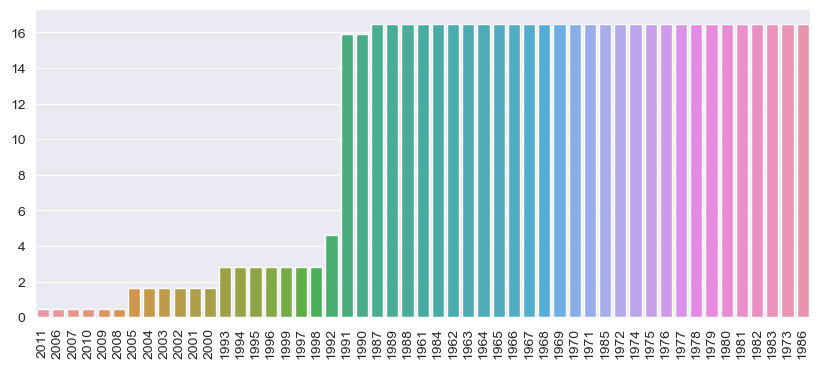

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(x=miss_fao.index,y=miss_fao)
plt.xticks(rotation=90);

## Dataframe: `df_transposed`

In [21]:
miss_trasp = percent_missing(df_transposed)
miss_trasp

value    10.31819
dtype: float64

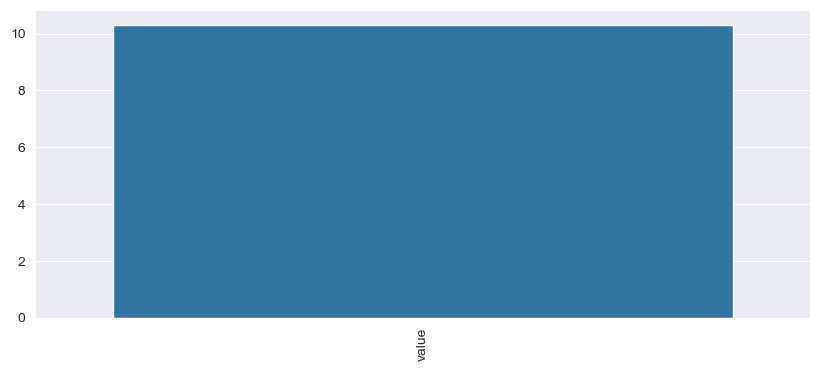

In [22]:
plt.figure(figsize=(10,4))
sns.barplot(x=miss_trasp.index,y=miss_trasp)
plt.xticks(rotation=90);

## Dataframe `fao_stat`

In [23]:
miss_fao_stat = percent_missing(fao_stat)
miss_fao_stat

temp_value    3.153195
dtype: float64

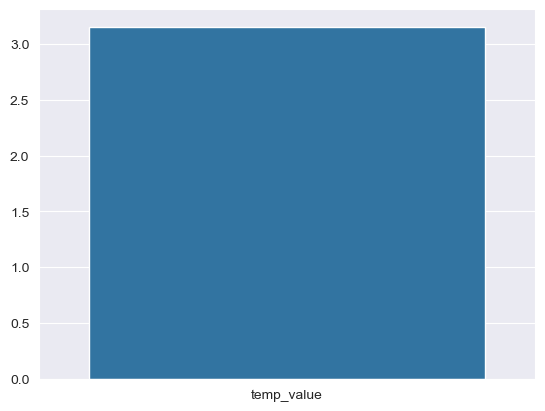

In [24]:
sns.barplot(x=miss_fao_stat.index,y=miss_fao_stat);

## Dataframe `food`

In [25]:
miss_food = percent_missing(food)
miss_food

Emissioni eutrofiche per chilogrammo                          11.627907
Prelievo di acqua dolce per chilogrammo                       11.627907
Uso del suolo per chilogrammo                                 11.627907
Utilizzo di acqua ponderato per scarsità per chilogrammo      11.627907
Emissioni eutrofiche per 1000 kcal                            23.255814
Emissioni di gas serra per 1000 kcal                          23.255814
Uso del suolo per 1000 kcal                                   23.255814
Prelievo di acqua dolce per 1000 kcal                         30.232558
Utilizzo di acqua ponderato per scarsità per 1000 kcal        30.232558
Emissioni eutrofiche per 100g proteine                        37.209302
Emissioni di gas serra per 100g proteine                      37.209302
Uso del suolo per 100g proteine                               37.209302
Prelievo di acqua dolce per 100g proteine                     39.534884
Utilizzo di acqua ponderato per scarsità per 100g proteine    39

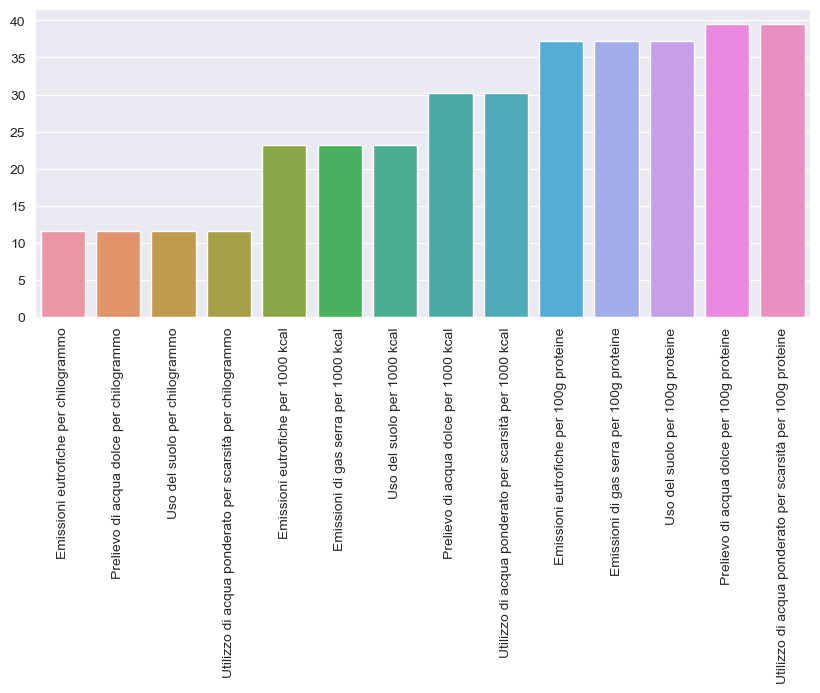

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x=miss_food.index,y=miss_food)
plt.xticks(rotation=90);

## `ultimate_df` 

In [27]:
miss_ultimate = percent_missing(ultimate_df)
miss_ultimate

value                                                         10.904980
Emissioni eutrofiche per chilogrammo                          13.369845
Prelievo di acqua dolce per chilogrammo                       13.369845
Uso del suolo per chilogrammo                                 13.369845
Utilizzo di acqua ponderato per scarsità per chilogrammo      13.369845
Emissioni eutrofiche per 1000 kcal                            23.679124
Emissioni di gas serra per 1000 kcal                          23.679124
Uso del suolo per 1000 kcal                                   23.679124
Emissioni eutrofiche per 100g proteine                        31.561426
Emissioni di gas serra per 100g proteine                      31.561426
Uso del suolo per 100g proteine                               31.561426
Prelievo di acqua dolce per 1000 kcal                         31.572165
Utilizzo di acqua ponderato per scarsità per 1000 kcal        31.572165
Prelievo di acqua dolce per 100g proteine                     33

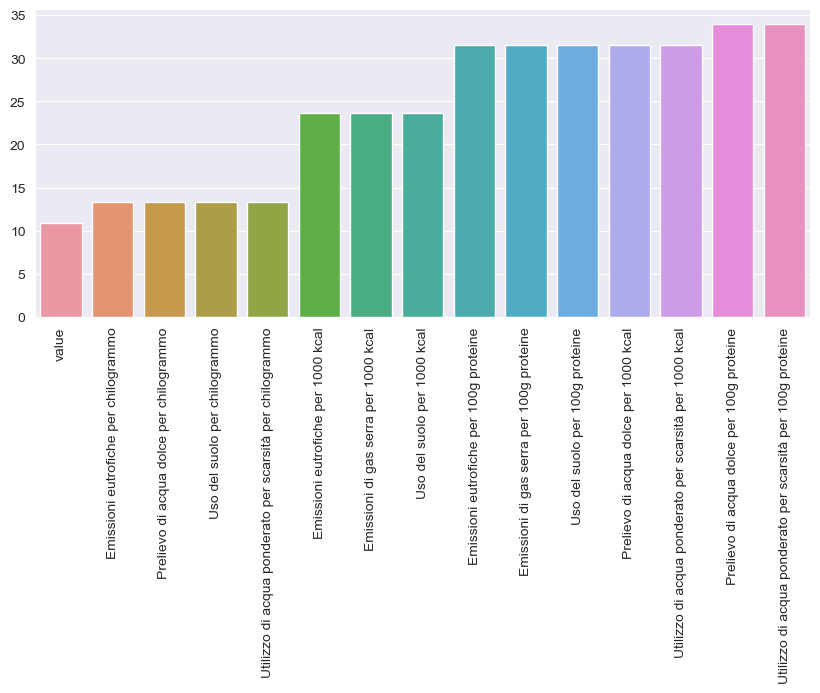

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(x=miss_ultimate.index,y=miss_ultimate)
plt.xticks(rotation=90);

# EDA

## Climate Change

In [29]:
# I'm checking the values throught the Quantiles
print("Temperature change Based on ordered values of climate change:\n")
fao_stat.temp_value.quantile([0, .10,.20, 0.28, 0.50, 0.80, 1])

Temperature change Based on ordered values of climate change:



0.00    -9.303
0.10    -0.512
0.20    -0.173
0.28     0.004
0.50     0.419
0.80     1.155
1.00    11.759
Name: temp_value, dtype: float64

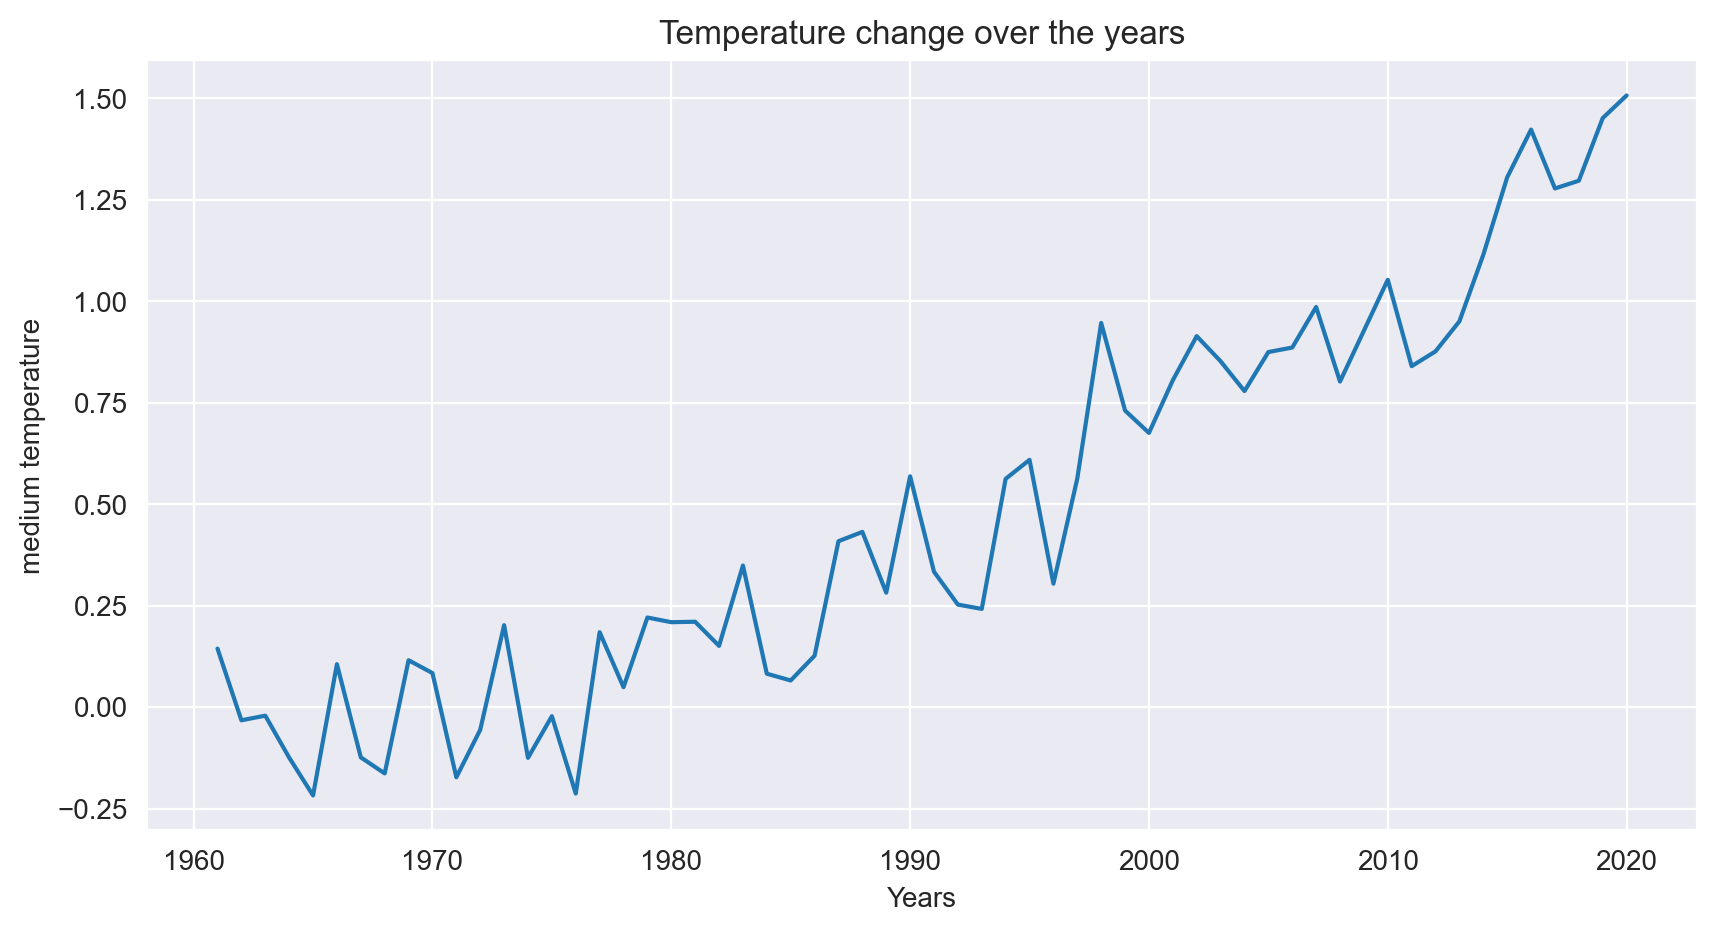

In [22]:
plt.figure(figsize=(10,5), dpi=200)
# Creating a copy of the DataFrame
df_copy = fao_stat.copy()

# Converting columns to the correct format
df_copy.loc[:, 'year'] = pd.to_datetime(df_copy['year'], format='%Y')
df_copy.loc[:, 'temp_value'] = df_copy['temp_value'].astype(float)

# Calculation of the annual average of temperatures
df_avg = df_copy.groupby(df_copy['year'].dt.year)['temp_value'].mean()

# Graph Creation
plt.plot(df_avg.index, df_avg.values)
plt.xlabel('Years')
plt.ylabel('medium temperature')
plt.title('Temperature change over the years')
plt.show()

## Food production and waste

In [23]:
df_index = df_transposed.set_index('year')
unita_cibo_anni = df_index.groupby(level='year')['value'].sum().reset_index()

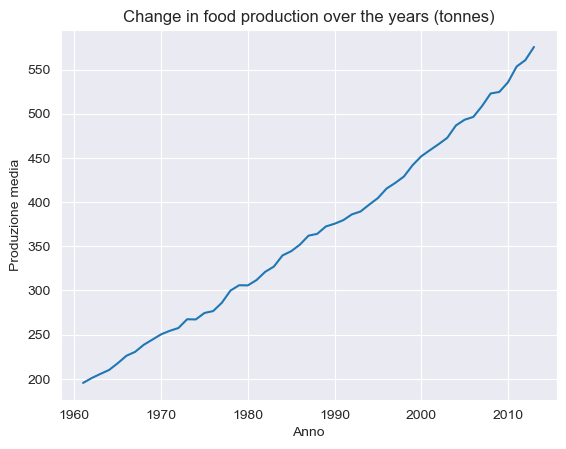

In [24]:
# I create a copy of the DataFrame
df_copy2 = df_transposed.copy()

# I convert the columns to the correct format
df_copy2.loc[:, 'year'] = pd.to_datetime(df_copy2['year'], format='%Y')
df_copy2.loc[:, 'value'] = df_copy2['value'].astype(float)

# Calculation of the annual average of food consumption
df_avg = df_copy2.groupby(df_copy2['year'].dt.year)['value'].mean()

# Creating the graph
plt.plot(df_avg.index, df_avg.values)
plt.xlabel('Anno')
plt.ylabel('Produzione media')
plt.title('Change in food production over the years (tonnes)')
plt.show()

## Food and feed having the worst impact on the environment

I have chosen to show all products with a total emission value greater than the average of the column $5.9720930232558125$ which I approximated to $6$.

**I will follow this rule for other cosideration aswell**.

In [26]:
food['Emissioni totali'].mean()

5.9720930232558125

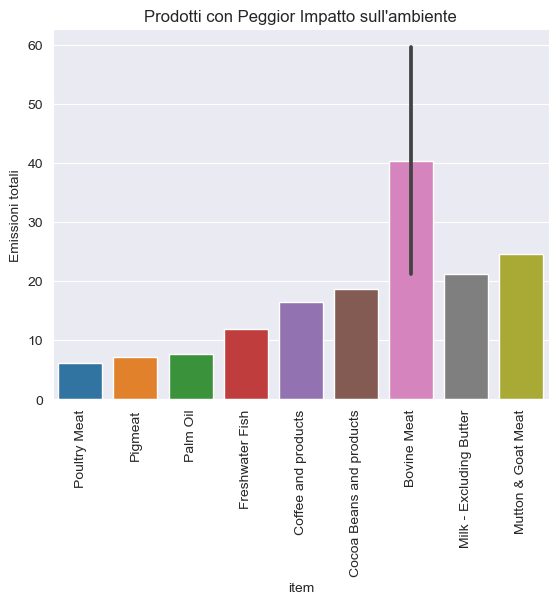

In [35]:
emissioni_hard = food[food['Emissioni totali']>6].sort_values('Emissioni totali', ascending=True)

sns.barplot(data=emissioni_hard, x='item', y='Emissioni totali')
plt.title("Prodotti con Peggior Impatto sull'ambiente")
plt.xticks(rotation=90);

## eutrophication, What is destroying our aquatic fauna?

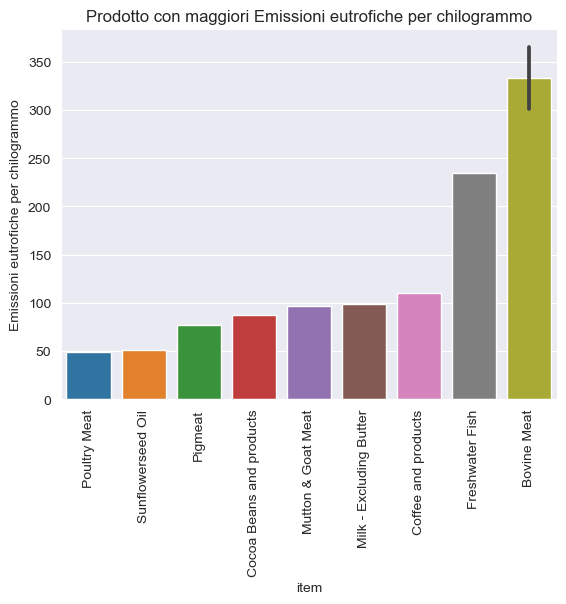

In [37]:
# 46 è la media
eutofizzazione = food[food['Emissioni eutrofiche per chilogrammo']>46].sort_values(by='Emissioni eutrofiche per chilogrammo', ascending=True)

sns.barplot(data=eutofizzazione, x='item', y='Emissioni eutrofiche per chilogrammo')
plt.title("Prodotto con maggiori Emissioni eutrofiche per chilogrammo")
plt.xticks(rotation=90);

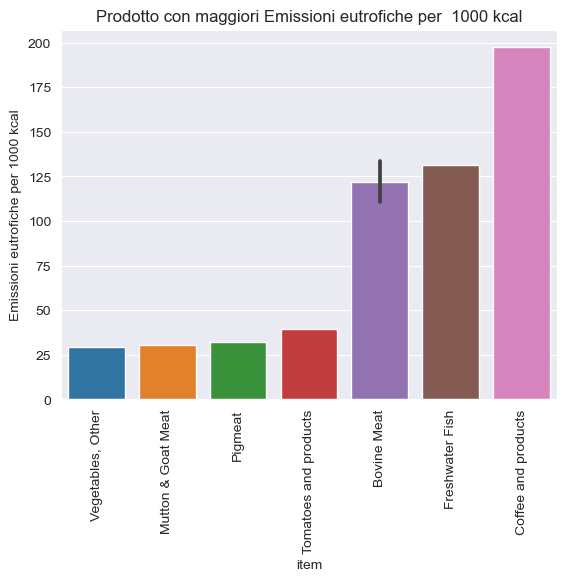

In [38]:
# 27 is the mean
eutofizzazione2 = food[food['Emissioni eutrofiche per 1000 kcal']>27].sort_values(by='Emissioni eutrofiche per 1000 kcal', ascending=True)

sns.barplot(data=eutofizzazione2, x='item', y='Emissioni eutrofiche per 1000 kcal')
plt.title("Prodotto con maggiori Emissioni eutrofiche per  1000 kcal")
plt.xticks(rotation=90);

## Consumption of water resources: which foods have a serious effect?

***1000 Kcal***

In [39]:
food['Prelievo di acqua dolce per 1000 kcal'].mean()

504.18897717399994

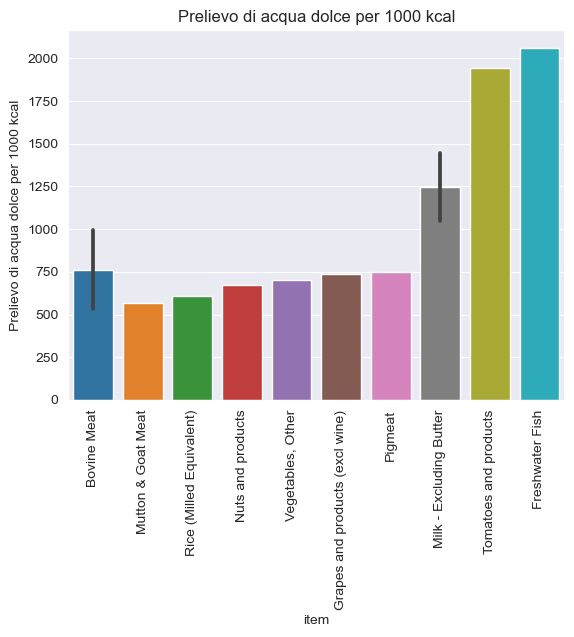

In [41]:
water1 = food[food['Prelievo di acqua dolce per 1000 kcal']>500].sort_values(by='Prelievo di acqua dolce per 1000 kcal', ascending=True)

sns.barplot(data=water1, x='item', y='Prelievo di acqua dolce per 1000 kcal')
plt.title("Prelievo di acqua dolce per 1000 kcal")
plt.xticks(rotation=90);

**Proteine gr**

In [42]:
food['Prelievo di acqua dolce per 100g proteine'].mean()

1437.975323523077

In [43]:
q1 = food['Prelievo di acqua dolce per 100g proteine'].quantile(0.30)
q1

450.85021175

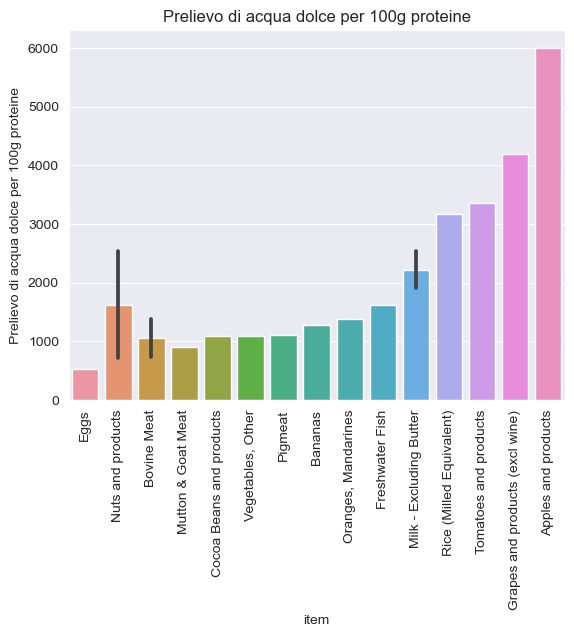

In [45]:
water2 = food[food['Prelievo di acqua dolce per 100g proteine']>450].sort_values(by='Prelievo di acqua dolce per 100g proteine', ascending=True)

sns.barplot(data=water2, x='item', y='Prelievo di acqua dolce per 100g proteine')
plt.title("Prelievo di acqua dolce per 100g proteine")
plt.xticks(rotation=90);

## which is the country that over time has been most successful in reducing the negative impact of its production and distribution of Total Emissions?

In [46]:
# I group by "area" and calculate the initial and final total emissions
ultimate_df["Emissioni_totali_iniziali"] = ultimate_df.groupby("area")["Emissioni totali"].transform("first")
ultimate_df["Emissioni_totali_finali"] = ultimate_df.groupby("area")["Emissioni totali"].transform("last")

# I calculate the difference between the initial and final total emissions for each country
ultimate_df["Emissioni_totali_diff"] = ultimate_df["Emissioni_totali_finali"] - ultimate_df["Emissioni_totali_iniziali"]

# I find the country with the largest decrease in total emissions
paese_migliore = ultimate_df.loc[ultimate_df["Emissioni_totali_diff"].idxmin()]["area"]

print("The country that has been most successful over time in decreasing the negative impact of its production and distribution of food and feed is:", paese_migliore)


Il paese che nel tempo è più riuscito a diminuire l'impatto negativo della propria produzione e distribuzione di alimenti e mangimi è: Kuwait


## First Nations for Production

Mostra le prime nazioni per produzione globale

In [47]:
df_grouped = df_transposed.groupby(['area', 'year'])['value'].sum().reset_index()
df_grouped = df_grouped.sort_values('value', ascending=False)
areas = df_grouped['area'].unique()

In [48]:
# I save a Dataframe with the sum of values by area for a later plot
nazioni_emissioni = df_grouped.groupby('area').sum().sort_values('value', ascending=False)
nazioni_emissioni.head(10)

,value
area,
"China, mainland",76248859.0
United States of America,41719176.0
India,36549150.0
Brazil,13818239.0
Germany,12300442.0
Japan,9840441.0
France,8789026.0
Italy,7734322.0
Russian Federation,7726768.0


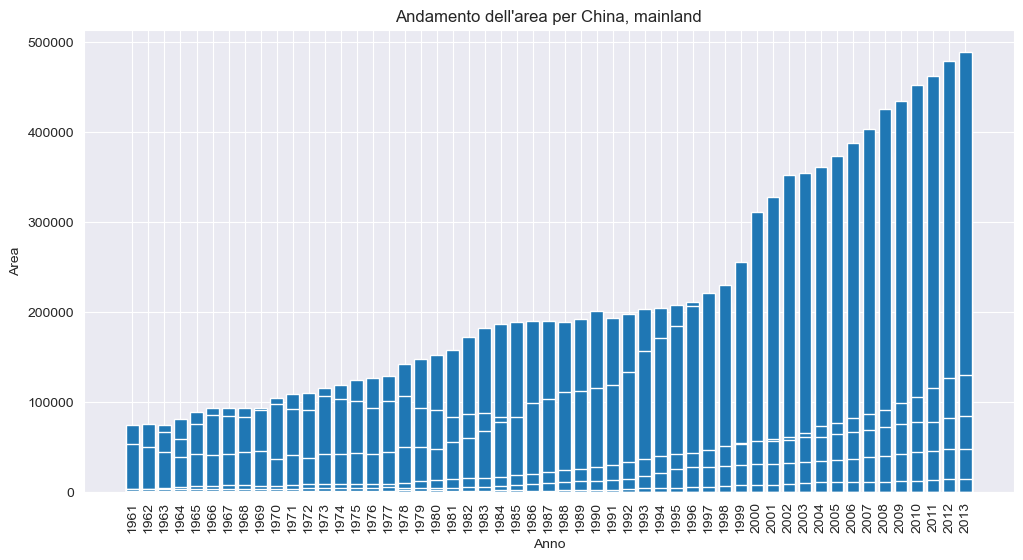

In [49]:
prima_nazione = df_transposed.sort_values('value', ascending=False)['area'].iloc[0]

# I filter the dataframe only for the first country
df_prima_nazione = df_transposed[df_transposed['area'] == prima_nazione]

# I create a bar histogram for the trend of the area over the years
plt.figure(figsize=(12,6))
plt.bar(df_prima_nazione['year'], df_prima_nazione['value'])
plt.xlabel('Anno')
plt.ylabel('Area')
plt.title(f"Andamento dela produzione per {prima_nazione}")
plt.xticks(rotation=90)
plt.show()

In [50]:
# Excluding China
no_china = df_transposed[df_transposed['area'] != 'China, mainland'].sort_values('value', ascending=False)

In [51]:
no_china.head(3)

,area,item,element,unit,latitude,longitude,year,value
1125943,India,Cereals - Excluding Beer,Food,1000 tonnes,20.59,78.96,2013,185884.0
1082989,India,Cereals - Excluding Beer,Food,1000 tonnes,20.59,78.96,2011,184648.0
1061512,India,Cereals - Excluding Beer,Food,1000 tonnes,20.59,78.96,2010,184552.0


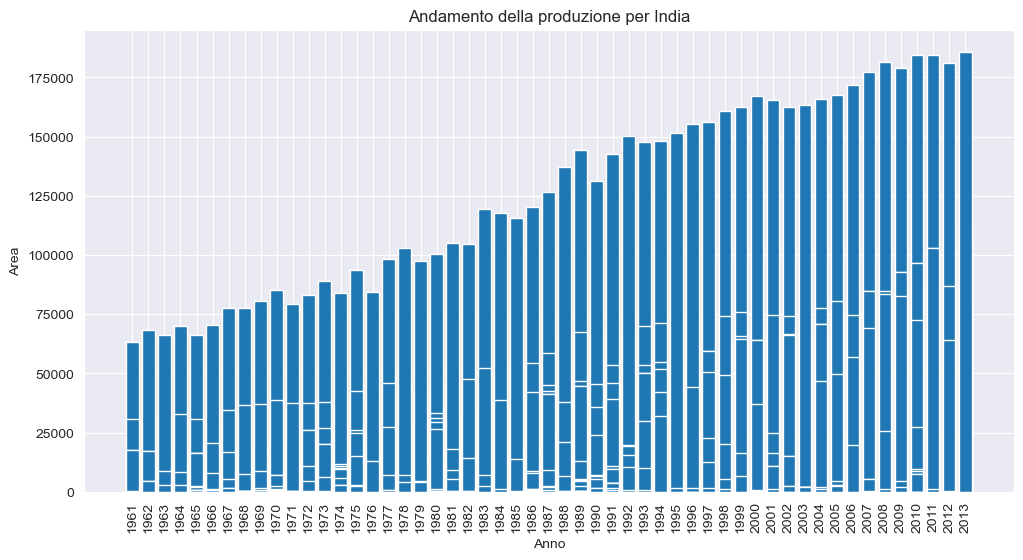

In [52]:
no_cina2 = no_china.iloc[0]['area']

# I filter the dataframe only for the first country
df_prima_nazione = no_china[no_china['area'] == no_cina2].sort_values('year')

# I create a bar histogram for the trend of the area over the years
plt.figure(figsize=(12,6))
plt.bar(df_prima_nazione['year'], df_prima_nazione['value'])
plt.xlabel('Anno')
plt.ylabel('Area')
plt.title(f"Andamento della produzione per {no_cina2}")
plt.xticks(rotation=90)
plt.show()

### `nazioni_Tipologia_prodotti`

Shows the earnings made by each nation depending on the item sold

In [53]:
nazioni_Tipologia_prodotti = df_transposed.groupby('area')[['item', 'value']].agg({'item': 'unique', 'value': 'sum'})
nazioni_Tipologia_prodotti.value.astype(float)
nazioni_Tipologia_prodotti.sort_values('value', ascending=False, inplace=True)
nazioni_Tipologia_prodotti.reset_index(inplace=True)
nazioni_Tipologia_prodotti.head()

,area,item,value
0,"China, mainland","[Wheat and products, Rice (Milled Equivalent),...",76248859.0
1,United States of America,"[Wheat and products, Rice (Milled Equivalent),...",41719176.0
2,India,"[Wheat and products, Rice (Milled Equivalent),...",36549150.0
3,Brazil,"[Wheat and products, Rice (Milled Equivalent),...",13818239.0
4,Germany,"[Wheat and products, Rice (Milled Equivalent),...",12300442.0


In [54]:
nazioni_Tipologia_prodotti.quantile([.2, .5, .8])

,value
0.2,66245.6
0.5,384845.0
0.8,1625643.2


In [55]:
bad_nation = nazioni_Tipologia_prodotti[nazioni_Tipologia_prodotti.value>=1625643.2]
low_production_nation = nazioni_Tipologia_prodotti[nazioni_Tipologia_prodotti.value<=66245.6]

bad_nation.shape, low_production_nation.shape

((35, 3), (35, 3))

### `nazioni item dataframe`

Mostra la quantita e la tipologia di prodotti divisi per nazione

In [56]:
df_index3 = df_transposed.set_index('area')
nazioni_item = df_index3.groupby(level='area')['item'].value_counts()

nazioni_item_df = nazioni_item.reset_index(name='item_count')
nazioni_item_df

,area,item,item_count
0,Afghanistan,Milk - Excluding Butter,212
1,Afghanistan,Barley and products,106
2,Afghanistan,Cereals - Excluding Beer,106
3,Afghanistan,Eggs,106
4,Afghanistan,Maize and products,106
...,...,...,...
17694,Zimbabwe,Vegetable Oils,53
17695,Zimbabwe,Vegetables,53
17696,Zimbabwe,"Vegetables, Other",53
17697,Zimbabwe,Wheat and products,53


In [57]:
# Sgamati !
nazioni_item_df.quantile([.78, .79, .8, .99])

,item_count
0.78,53.0
0.79,53.0
0.80,106.0
0.99,106.0


In [58]:
# This dataframe contains only countries with production of an object above the 80th quantile
Devils_Transactions = nazioni_item_df[nazioni_item_df.item_count>=106.0]
Devils_Transactions

,area,item,item_count
0,Afghanistan,Milk - Excluding Butter,212
1,Afghanistan,Barley and products,106
2,Afghanistan,Cereals - Excluding Beer,106
3,Afghanistan,Eggs,106
4,Afghanistan,Maize and products,106
...,...,...,...
17599,Zimbabwe,Oats,106
17600,Zimbabwe,Oilcrops,106
17601,Zimbabwe,"Oilcrops, Other",106
17602,Zimbabwe,Pelagic Fish,106


In [59]:

mapping = {
    'Poultry Meat': 'Poultry Meat',
    'Pig Meat': 'Pig meat',
    'Palm Oil': 'Palm Oil',
    'Shrimps (farmed)': 'Crustaceans',
    'Coffee': 'Coffee',
    'Dark Chocolate': 'Dark Chocolate',
    'Beef (dairy herd)': 'Bovine Meat',
    'Cheese': 'Cheese',
    'Lamb & Mutton': 'Lamb & Mutton',
    'Beef (beef herd)': 'Bovine Meat'
}

right_elements = list(mapping.values())

In [60]:
hard_productor = nazioni_item_df[nazioni_item_df.item.isin(right_elements)]
hard_productor.head(3)

,area,item,item_count
13,Afghanistan,Bovine Meat,53
45,Afghanistan,Palm Oil,53
49,Afghanistan,Poultry Meat,53


In [61]:
hard_productor.describe()

,item_count
count,643.000000
mean,54.813375
std,9.641842
min,53.000000
25%,53.000000
50%,53.000000
75%,53.000000
max,106.000000


In [62]:
nazioni_emissioni[:10]

,value
area,
"China, mainland",76248859.0
United States of America,41719176.0
India,36549150.0
Brazil,13818239.0
Germany,12300442.0
Japan,9840441.0
France,8789026.0
Italy,7734322.0
Russian Federation,7726768.0


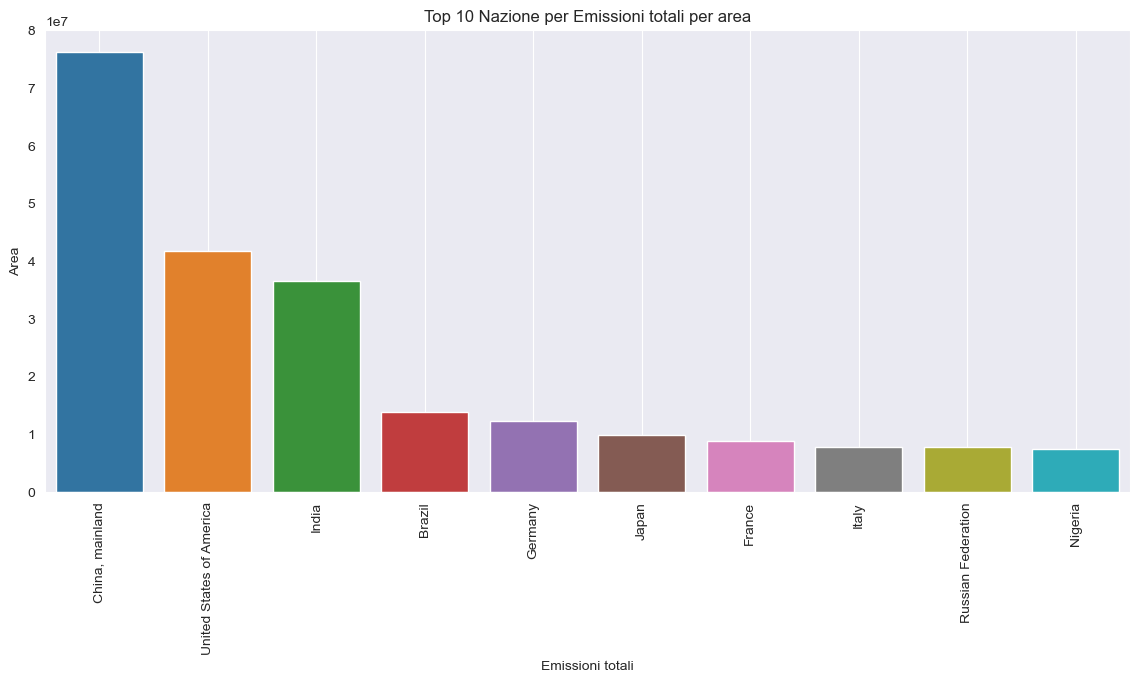

In [63]:
# I create the bar chart with the Top 10 Countries With the Highest Emissions 
plt.figure(figsize=(14, 6))
sns.barplot(x=nazioni_emissioni.index[:10], y=nazioni_emissioni.value[:10], data=nazioni_emissioni[:10])

# I add title and label to the axes
plt.title('Top 10 Nazione per Emissioni totali per area')
plt.xlabel('Emissioni totali')
plt.ylabel('Area')
plt.xticks(rotation=90)
plt.grid()
# I show the graph
plt.show()

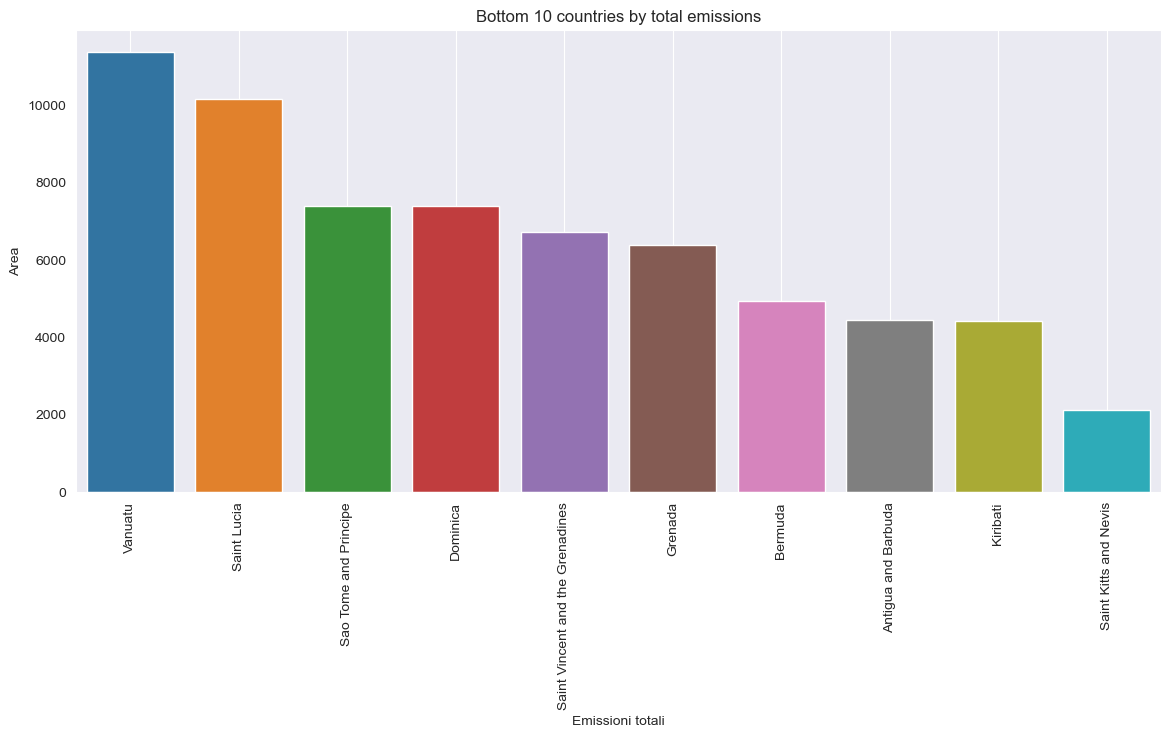

In [64]:
# Top 10 Countries With Lower Emissions
plt.figure(figsize=(14, 6))
sns.barplot(x=nazioni_emissioni.index[-10:], y=nazioni_emissioni.value[-10:], data=nazioni_emissioni[:10])


plt.title('Bottom 10 countries by total emissions')
plt.xlabel('Emissioni totali')
plt.ylabel('Area')
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [65]:
test = ultimate_df.groupby(['year','area'])['Agricoltura'].sum()
nazioni_agricoltura = test.reset_index(['year','area']).groupby('area')['Agricoltura'].sum()
nazioni_agricoltura = nazioni_agricoltura.reset_index().sort_values('Agricoltura', ascending=False)

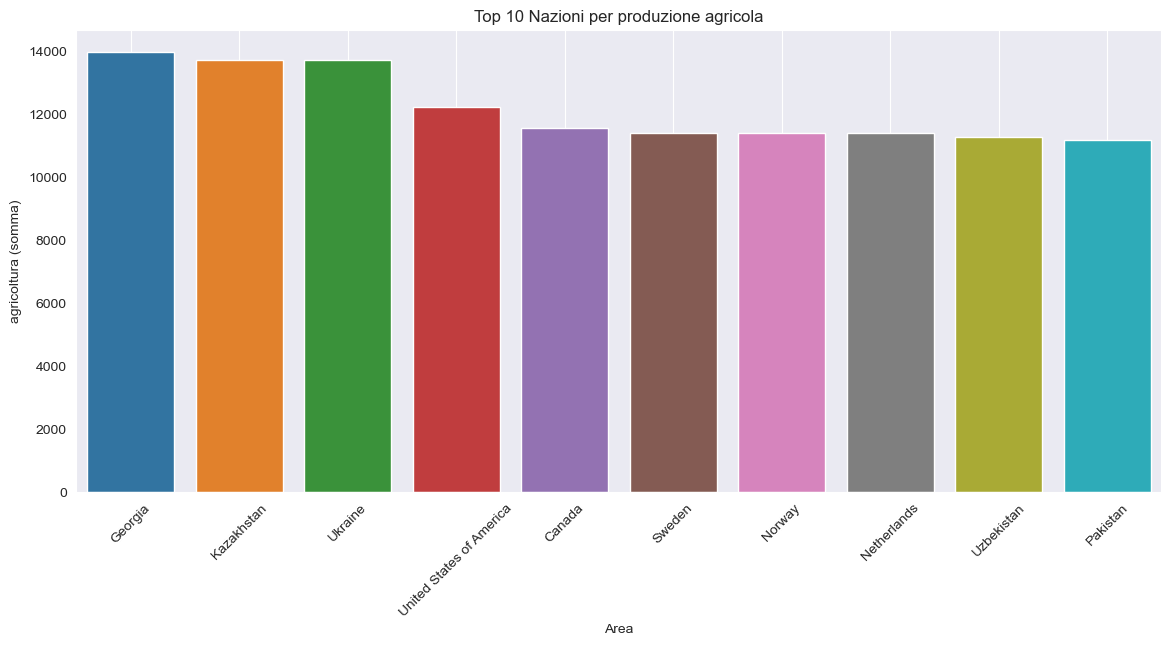

In [66]:
# I create the bar graph of the Top 10 Nations With the largest agricultural income

plt.figure(figsize=(14, 6))
sns.barplot(x='area', y='Agricoltura', data=nazioni_agricoltura[:10])


plt.title('Top 10 Nazioni per produzione agricola')
plt.xlabel('Area')
plt.ylabel('agricoltura (somma)')
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [67]:
nazioni_prodotto = ultimate_df.groupby(['area','year'])[['item','value','Emissioni totali']].agg({'item':'unique','value':'sum','Emissioni totali':'sum'})
nazioni_prodotto.sort_values(['value','Emissioni totali'], ascending=False, inplace=True)
nazioni_prodotto.reset_index(inplace=True)
nazioni_prodotto

,area,year,item,value,Emissioni totali
0,"China, mainland",2013,"[Wheat and products, Rice (Milled Equivalent),...",2478345.0,347.3
1,"China, mainland",2012,"[Wheat and products, Rice (Milled Equivalent),...",2425389.0,347.3
2,"China, mainland",2011,"[Wheat and products, Rice (Milled Equivalent),...",2337855.0,347.3
3,"China, mainland",2010,"[Wheat and products, Rice (Milled Equivalent),...",2248332.0,347.3
4,"China, mainland",2009,"[Wheat and products, Rice (Milled Equivalent),...",2150758.0,347.3
...,...,...,...,...,...
9217,Sudan,2007,"[Wheat and products, Rice (Milled Equivalent),...",0.0,275.5
9218,Sudan,2008,"[Wheat and products, Rice (Milled Equivalent),...",0.0,275.5
9219,Sudan,2009,"[Wheat and products, Rice (Milled Equivalent),...",0.0,275.5
9220,Sudan,2010,"[Wheat and products, Rice (Milled Equivalent),...",0.0,275.5


In [68]:
nazioni_prodotto.corr()

,value,Emissioni totali
value,1.000000,0.211975
Emissioni totali,0.211975,1.000000


In [69]:
nazioni_prodotto.quantile([.2,.3,.4,.5,.6,.7,.8,.9])

,value,Emissioni totali
0.2,174.0,285.9
0.3,752.3,289.4
0.4,1918.8,309.4
0.5,3890.5,330.3
0.6,7001.2,336.1
0.7,12609.8,338.3
0.8,21923.6,344.3
0.9,58352.6,352.5


In [70]:
mason_method = ultimate_df.dropna().copy()

In [71]:
# that would be a sad loss.
mason_method.shape

(265632, 33)

**How much does this drop affect data?**

In [72]:
ultimate_df.corr()['Emissioni totali']

latitude                                                     -0.012073
longitude                                                     0.002935
value                                                        -0.001919
Cambiamento di uso del suolo                                  0.814846
Mangime animale                                               0.612384
Agricoltura                                                   0.972228
Elaborazione                                                  0.764913
Trasporto                                                     0.277097
Imballaggio                                                   0.211090
Vendita al dettaglio                                          0.403632
Emissioni totali                                              1.000000
Emissioni eutrofiche per 1000 kcal                            0.521880
Emissioni eutrofiche per chilogrammo                          0.763418
Emissioni eutrofiche per 100g proteine                        0.636831
Prelie

In [73]:
mason_method.corr()['Emissioni totali']

latitude                                                     -0.011086
longitude                                                     0.004037
value                                                        -0.002888
Cambiamento di uso del suolo                                  0.818636
Mangime animale                                               0.573934
Agricoltura                                                   0.971975
Elaborazione                                                  0.887383
Trasporto                                                     0.428641
Imballaggio                                                   0.323913
Vendita al dettaglio                                          0.482088
Emissioni totali                                              1.000000
Emissioni eutrofiche per 1000 kcal                            0.497438
Emissioni eutrofiche per chilogrammo                          0.747798
Emissioni eutrofiche per 100g proteine                        0.618466
Prelie

In [74]:
# Percentage of change.
(abs(ultimate_df.corr()['Emissioni totali'])-abs(mason_method.corr()['Emissioni totali'])).sum()*100

-31.488475924713477

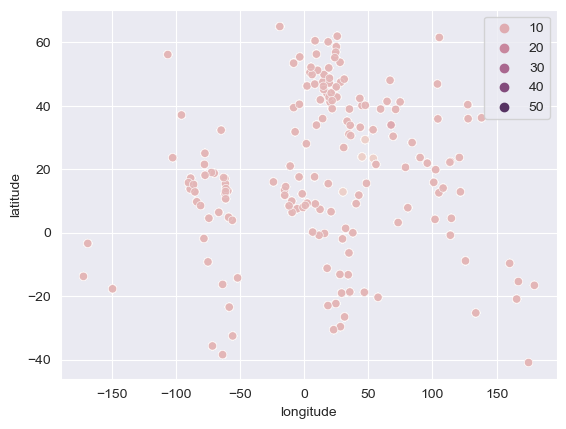

In [75]:
ax = sns.scatterplot(data=ultimate_df, x='longitude', y='latitude', hue='Emissioni totali', alpha=.8)
ax.legend(loc="best")  # I manually specify the position of the legend
plt.show()

**Once `latitude` and `longitude` are removed the df should be ready**

In [78]:
mason_method2 = mason_method.drop(['latitude','longitude'], axis=1)

<Axes: >

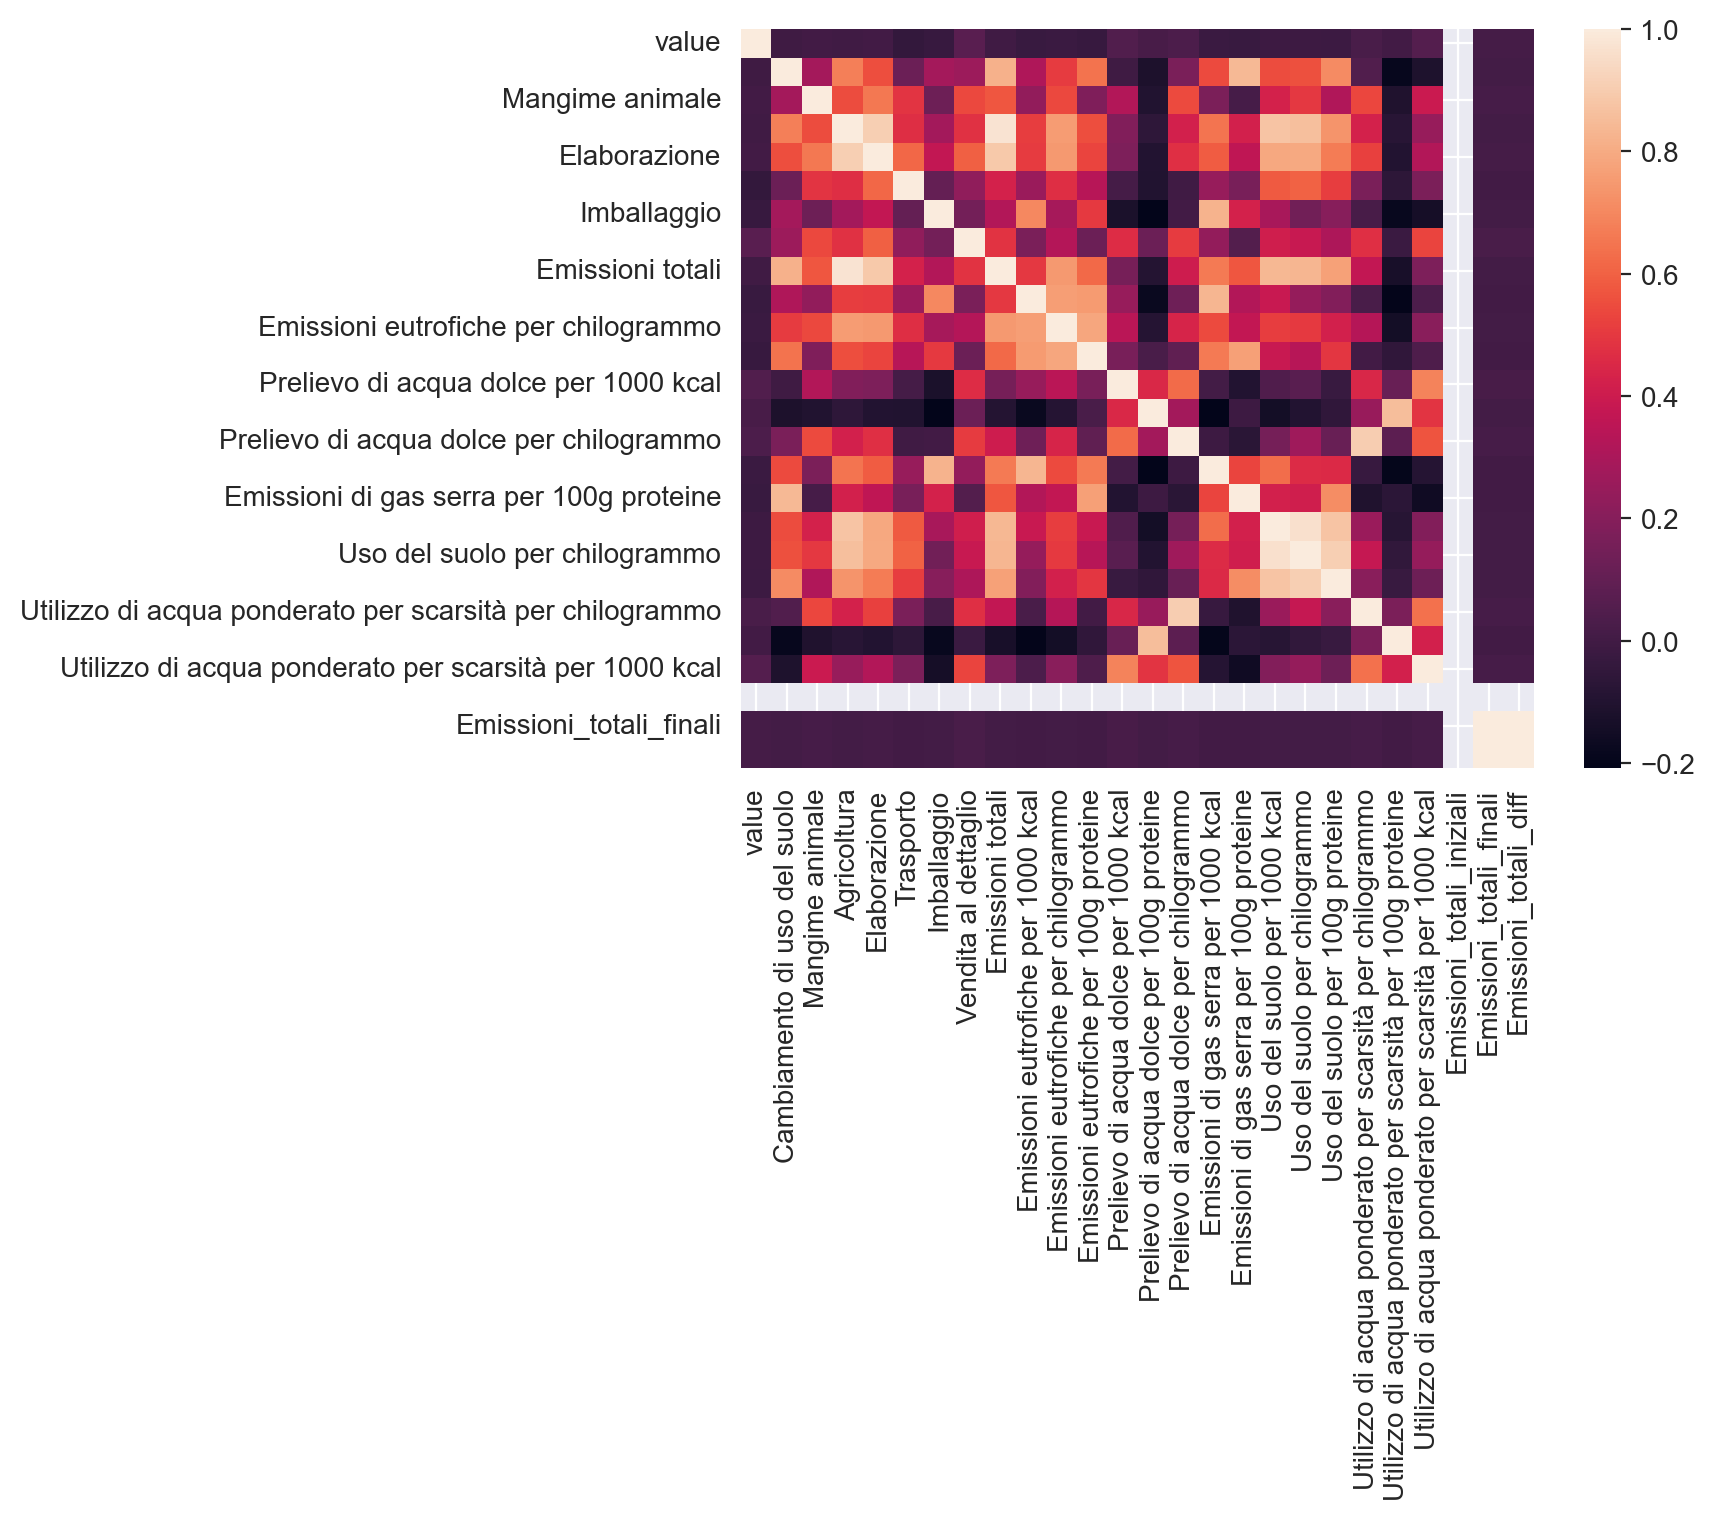

In [79]:
plt.figure(dpi=200)
sns.heatmap(mason_method2.corr(),annot=False)

# index

## eutrophication


Eutrophication is an environmental phenomenon in which an excess of nutrients, such as **nitrogen** and **phosphorus**, is introduced into aquatic ecosystems, such as rivers, lakes or seas.
These excess nutrients can lead to an overgrowth of algae and other aquatic plants, known as an **algal bloom**. During **algae decomposition**, the oxygen in the water is used up, creating dead zones where aquatic life is compromised.

**"Eutrophic emissions"** refer to the emissions of nutrients, such as nitrogen and phosphorus, that are associated with the production of a particular food or product. In the context of "Eutrophic emissions per 100g protein", we are considering the nutrient emissions associated with the production of 100 grams of protein.

---------

----
## Fresh water withdrawal per 1000 kcal:

Indicates the amount of fresh water needed to produce or grow food that provides 1000 calories of energy. Indicates how much fresh water is used during the production process, which may include irrigating fields, raising animals or processing food.

The more freshwater that is used, the greater the environmental and water impact associated with producing that food.

## Fresh water sampling per 100g of protein:

This indicates the amount of fresh water needed to produce or grow food that contains 100 grams of protein. The protein can come from plant or animal sources, but its production requires the use of water resources. This measure helps to understand the water efficiency of protein production and can be useful for comparing different sources of protein in terms of water impact.

## Fresh water withdrawal per kilogram:

This phrase indicates the amount of fresh water required to produce or grow one kilogram of food. It is a general measure of the water impact associated with the production of a particular food. The more fresh water used to produce one kilogram of food, the greater the water footprint of that food.

----

----

## "Scarcity-weighted water use per kilogram":

Indicates the amount of water used, considering its impact on water scarcity, to produce one kilogram of a certain product or good.

## "Scarcity-weighted water usage per 100g of protein":

This indicates the amount of water used, considering its impact on water scarcity, to produce 100 grams of protein contained in a product or food

## "Scarcity-weighted water use per 1000 kcal":

This indicates the amount of water used, considering its impact on water scarcity, to produce 1000 calories of energy contained in a product or food.

----

In [ ]:
corrispondenze_invertite = {
    'Wheat & Rye (Bread)': 'Wheat and products',
    'Maize (Meal)': 'Maize and products',
    'Barley (Beer)': 'Barley and products',
    'Oatmeal': 'Cereals, Other',
    'Rice': 'Rice (Milled Equivalent)',
    'Potatoes': 'Potatoes and products',
    'Cassava': 'Cassava and products',
    'Cane Sugar': 'Sugar cane',
    'Beet Sugar': 'Sugar beet',
    'Other Pulses': 'Pulses, Other and products',
    'Peas': 'Pulses, Other and products',
    'Nuts': 'Nuts and products',
    'Groundnuts': 'Nuts and products',
    'Soymilk': 'Soyabean Oil',
    'Tofu': 'Soyabean Oil',
    'Soybean Oil': 'Soyabean Oil',
    'Palm Oil': 'Palm Oil',
    'Sunflower Oil': 'Sunflowerseed Oil',
    'Rapeseed Oil': 'Rape and Mustard Oil',
    'Olive Oil': 'Olive Oil',
    'Tomatoes': 'Tomatoes and products',
    'Onions & Leeks': 'Onions',
    'Root Vegetables': 'Vegetables, Other',
    'Brassicas': 'Vegetables, Other',
    'Other Vegetables': 'Vegetables, Other',
    'Citrus Fruit': 'Oranges, Mandarines',
    'Bananas': 'Bananas',
    'Apples': 'Apples and products',
    'Berries & Grapes': 'Grapes and products (excl wine)',
    'Wine': 'Wine',
    'Other Fruit': 'Fruits, Other',
    'Coffee': 'Coffee and products',
    'Dark Chocolate': 'Cocoa Beans and products',
    'Beef (beef herd)': 'Bovine Meat',
    'Beef (dairy herd)': 'Bovine Meat',
    'Lamb & Mutton': 'Mutton & Goat Meat',
    'Pig Meat': 'Pigmeat',
    'Poultry Meat': 'Poultry Meat',
    'Milk': 'Milk - Excluding Butter',
    'Cheese': 'Milk - Excluding Butter',
    'Eggs': 'Eggs',
    'Fish (farmed)': 'Freshwater Fish',
    'Shrimps (farmed)': 'Freshwater Fish'
}